# Forecasting Stock Prices
**Data Analytics and Big Data Capstone Project 2018c-5 - Data Science with Python**

### 2. Exploratory Data Analysis (EDA) - Workspace

In [1]:
# Load libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns; sns.set()

from matplotlib.pyplot import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# plot within notebook
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
## load parameters

# set start and end date range
start_date = dt.datetime(2018, 1, 31)
end_date = dt.datetime(2020, 5, 30)

# set figure size
rcParams['figure.figsize'] = 15, 8

In [3]:
# Load dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# load data
df = pd.read_csv('.\\data\\eod.data-intc.csv')

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace('_', '') for x in df.columns]

#### 2.1 General view

In [4]:
print('\n Shape of the data:\n')
print(df.shape)

print('\n Data\'s Info:\n')
print(df.info())

print('\n First data rows:')
df.head(5)


 Shape of the data:

(10090, 6)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 6 columns):
date      10090 non-null object
open      10090 non-null float64
high      10090 non-null float64
low       10090 non-null float64
close     10090 non-null float64
volume    10090 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 473.1+ KB
None

 First data rows:


,date,open,high,low,close,volume
0,3/17/1980,0.3255,0.3307,0.3255,0.3255,10924800
1,3/18/1980,0.3255,0.3281,0.3229,0.3229,17068800
2,3/19/1980,0.3307,0.3359,0.3307,0.3307,18508800
3,3/20/1980,0.3307,0.3346,0.3294,0.3294,11174400
4,3/21/1980,0.3229,0.3229,0.3177,0.3177,12172800


In [5]:
# setting the index as date
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
df.sort_index(ascending=True, axis=0, inplace=True)
df.head(5)

,open,high,low,close,volume
date,,,,,
1980-03-17,0.3255,0.3307,0.3255,0.3255,10924800
1980-03-18,0.3255,0.3281,0.3229,0.3229,17068800
1980-03-19,0.3307,0.3359,0.3307,0.3307,18508800
1980-03-20,0.3307,0.3346,0.3294,0.3294,11174400
1980-03-21,0.3229,0.3229,0.3177,0.3177,12172800


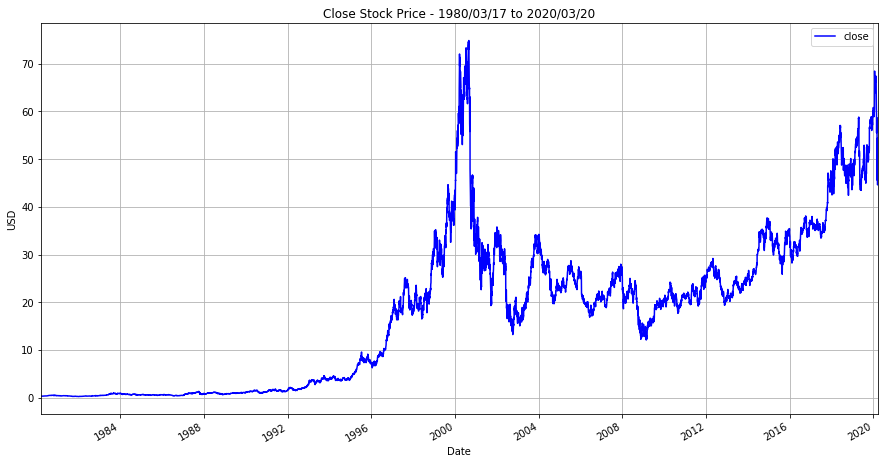

In [7]:
# plot close over time
rcParams['figure.figsize'] = 15, 8
title = 'Close Stock Price - ' + df.index[0].strftime("%Y/%m/%d") + ' to ' + df.index[len(df)-1].strftime("%Y/%m/%d")
ax = df.plot(y='close', style='b-', grid=True, title=title)
ax.set_xlabel("Date")
ax.set_ylabel("USD")

plt.savefig('.\\images\\Close_Stock_Price_Full.jpg')

In [8]:
df.describe()

,open,high,low,close,volume
count,10090.000000,10090.000000,10090.000000,10090.000000,1.009000e+04
mean,17.744796,17.988726,17.501696,17.743389,5.175399e+07
std,16.084734,16.313632,15.864770,16.085440,3.555889e+07
min,0.218800,0.218800,0.216100,0.216100,0.000000e+00
25%,1.130200,1.149350,1.117200,1.132800,2.760502e+07
50%,19.260000,19.500000,19.029950,19.250000,4.622693e+07
75%,27.306750,27.617500,26.909750,27.270000,6.631072e+07
max,75.630000,75.810000,73.630000,74.880000,5.677088e+08


In [9]:
# remove volume attribute
df.drop('volume', axis=1, inplace=True)
df.drop('open', axis=1, inplace=True)
df.drop('high', axis=1, inplace=True)
df.drop('low', axis=1, inplace=True)
df.head(5)

,close
date,
1980-03-17,0.3255
1980-03-18,0.3229
1980-03-19,0.3307
1980-03-20,0.3294
1980-03-21,0.3177


In [10]:
# get data range by date
df_adj = df.loc[start_date:end_date]

In [11]:
df_adj.head()

,close
date,
2018-01-31,48.14
2018-02-01,47.65
2018-02-02,46.15
2018-02-05,44.52
2018-02-06,44.91


In [12]:
df_adj.tail()

,close
date,
2020-03-16,44.61
2020-03-17,50.08
2020-03-18,47.61
2020-03-19,45.94
2020-03-20,45.83


In [13]:
print('\n Shape of the data:\n')
print(df_adj.shape)

print('\n Data\'s Info:\n')
print(df_adj.info())

print('\n First data rows:')
df_adj.head(5)


 Shape of the data:

(538, 1)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 2018-01-31 to 2020-03-20
Data columns (total 1 columns):
close    538 non-null float64
dtypes: float64(1)
memory usage: 8.4 KB
None

 First data rows:


,close
date,
2018-01-31,48.14
2018-02-01,47.65
2018-02-02,46.15
2018-02-05,44.52
2018-02-06,44.91


In [14]:
df_adj.describe()

,close
count,538.000000
mean,51.392565
std,5.197871
min,42.420000
25%,47.382500
50%,50.730000
75%,54.355000
max,68.470000


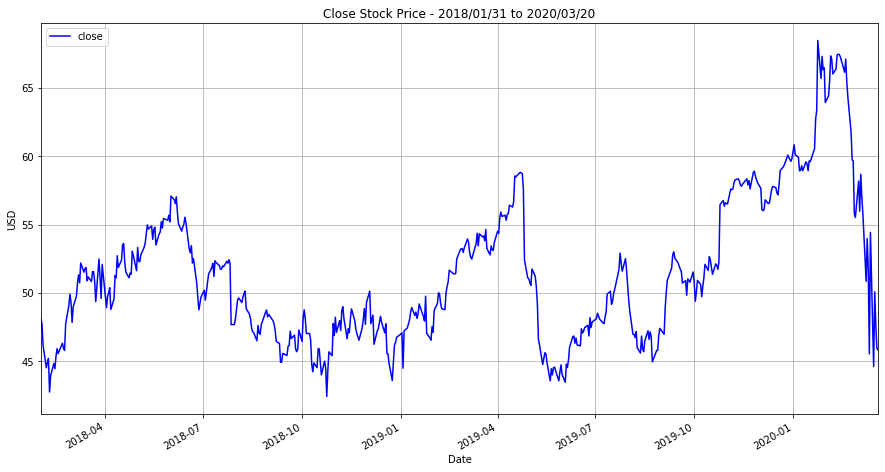

In [15]:
# plot close over time
rcParams['figure.figsize'] = 15, 8
title = 'Close Stock Price - ' + df_adj.index[0].strftime("%Y/%m/%d") + ' to ' + df_adj.index[len(df_adj)-1].strftime("%Y/%m/%d")
ax = df_adj.plot(y='close', style='b-', grid=True, title=title)
ax.set_xlabel("Date")
ax.set_ylabel("USD")

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_lv1.jpg')

#### 2.2 Grouped data review

In [86]:
# creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df_adj)), columns=['Date','Close'])

for i in range(0, len(df_adj)):
    new_data['Date'][i] = df_adj.index[i]
    new_data['Close'][i] = df_adj.close[i]
    
new_data.head()

,Date,Close
0,2018-01-31 00:00:00,48.14
1,2018-02-01 00:00:00,47.65
2,2018-02-02 00:00:00,46.15
3,2018-02-05 00:00:00,44.52
4,2018-02-06 00:00:00,44.91


In [87]:
new_data.tail()

,Date,Close
533,2020-03-16 00:00:00,44.61
534,2020-03-17 00:00:00,50.08
535,2020-03-18 00:00:00,47.61
536,2020-03-19 00:00:00,45.94
537,2020-03-20 00:00:00,45.83


In [93]:
new_data.Close = new_data.Close.astype(float)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 2 columns):
Date     538 non-null object
Close    538 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.5+ KB


In [41]:
from fastai.tabular import add_datepart

# create features
add_datepart(new_data, 'Date')

# remove atribute 'Elapsed', axis=1 means colummn
new_data.drop('Elapsed', axis=1, inplace=True)

new_data.drop('Is_month_end', axis=1, inplace=True)
new_data.drop('Is_month_start', axis=1, inplace=True)
new_data.drop('Is_quarter_end', axis=1, inplace=True)
new_data.drop('Is_quarter_start', axis=1, inplace=True)
new_data.drop('Is_year_end', axis=1, inplace=True)
new_data.drop('Is_year_start', axis=1, inplace=True)

print(new_data.shape)
new_data.head(5)

(538, 7)


,Close,Year,Month,Week,Day,Dayofweek,Dayofyear
0,48.14,2018,1,5,31,2,31
1,47.65,2018,2,5,1,3,32
2,46.15,2018,2,5,2,4,33
3,44.52,2018,2,6,5,0,36
4,44.91,2018,2,6,6,1,37


In [42]:
new_data['mon_fri'] = 0
for i in range(0, len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

new_data.head(5)  

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,mon_fri
0,48.14,2018,1,5,31,2,31,0
1,47.65,2018,2,5,1,3,32,0
2,46.15,2018,2,5,2,4,33,1
3,44.52,2018,2,6,5,0,36,1
4,44.91,2018,2,6,6,1,37,0


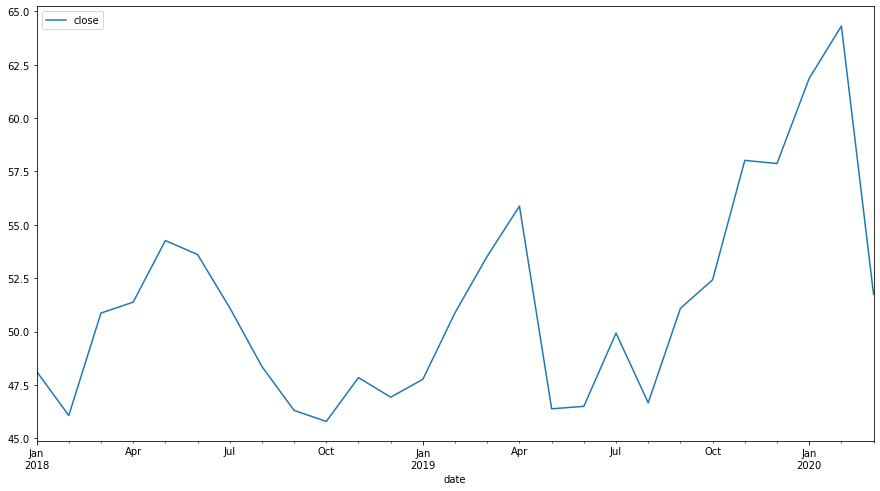

In [51]:
# year-by-year behavior per month
rcParams['figure.figsize'] = 10, 5
df_adj.resample('M').mean().plot()

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_YxYxMonth_lv1.jpg')

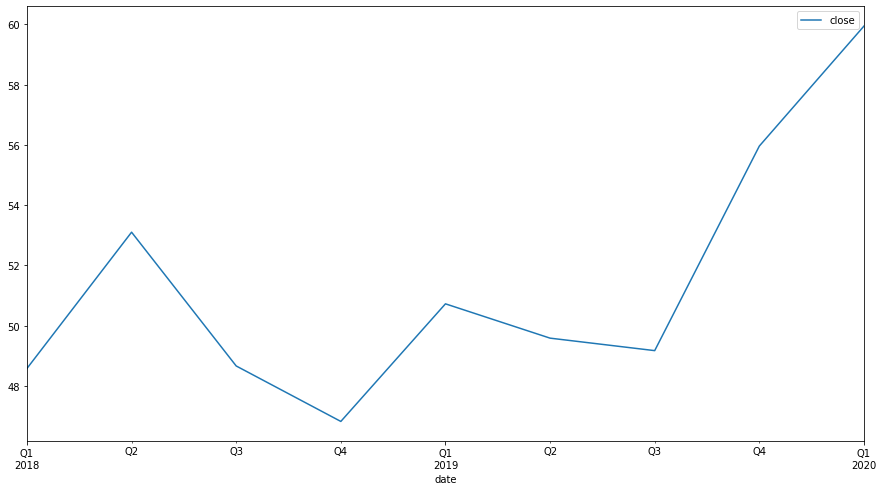

In [82]:
# year-on-year behavior by quarterly
rcParams['figure.figsize'] = 10, 5
df_adj.resample('Q').mean().plot()

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_YxYxQuarte_lv1.jpg')

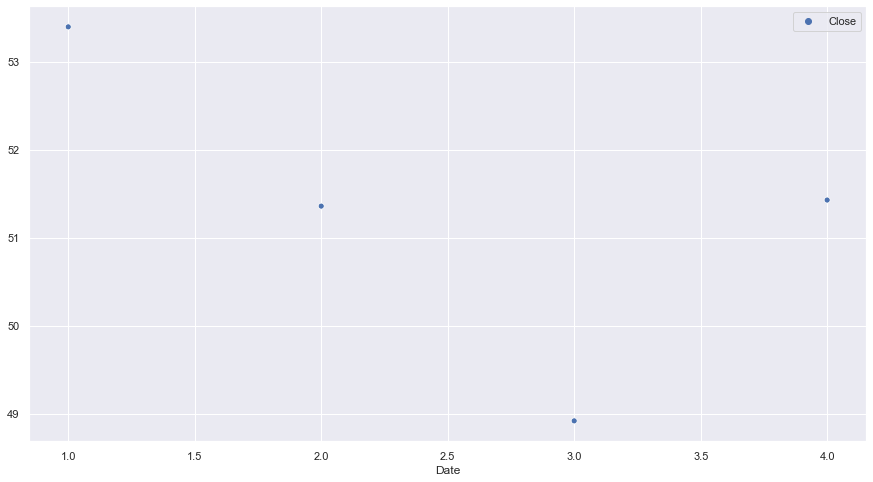

In [111]:
# cumulative average behavior per quarter
# 1, 2, 3, 4 {1st Quarter, 2dn Quarter, 3rd Quarter, 4th Quarter}
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.quarter).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeQuarte_lv1.jpg')

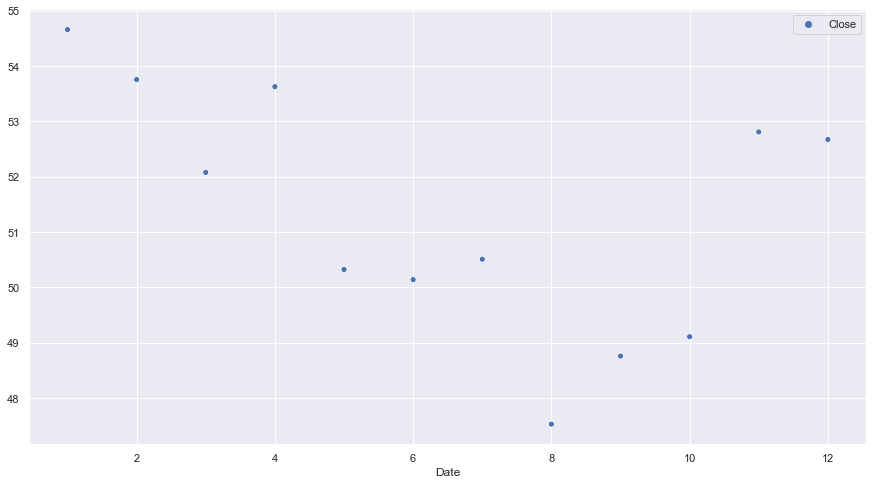

In [110]:
# monthly accumulated average behavior
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.month).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeMonth_lv1.jpg')

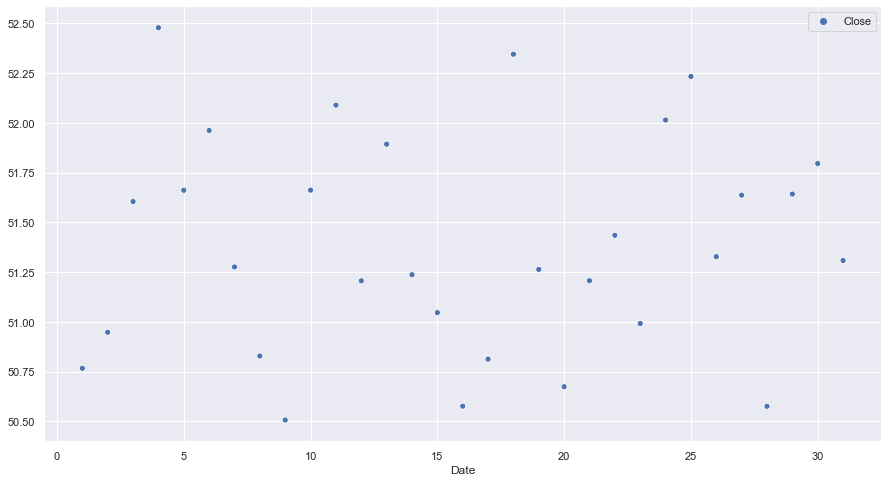

In [109]:
# average accumulated day by day
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.day).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeDayxDay_lv1.jpg')

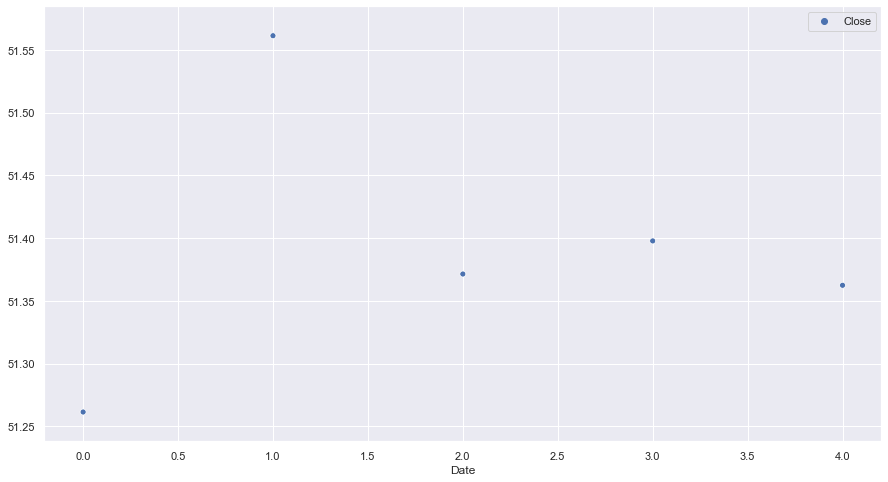

In [112]:
# daily average behavior
# 0, 1, 2, 3, 4 {Monday, Tuesday, Wednesday, Thursday, Friday}
rcParams['figure.figsize'] = 10, 5
a = new_data.groupby(new_data['Date'].dt.dayofweek).mean()
ax = sns.scatterplot(data=a)

plt.savefig('.\\images\\Close_Stock_Price_Adjusted_CumulativeDayofWeek_lv1.jpg')

#### 2.3 Save data adjusted

In [18]:
# load data
df_adj.to_csv('.\\data\\eod.data-intc-adjusted.lv1.csv')